## 1.3. fMRI BASICS
**Purpose**:  Load NIfTI files, inspect shape and metadata, plotting mean functional images over a standard MNI152 template, visualize glass brain and examine indivisual volumes/stats


In [1]:
import sys
sys.path.append("../../") 

from neurolib.fmri.io import load_fmri_sample
from neurolib.fmri.visualization import plot_mean_image, plot_stat_map_3d, plot_glass_brain
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

### Load fMRI Data

In [2]:
fmri_img = load_fmri_sample()

### Inspect the Data
What is in this fMRI dataset?

- 3D + time NIfTI image (`4D`): (X, Y, Z, Time)
- Each voxel represents a small volume of brain tissue.
- Values represent **BOLD signal intensity** over time.
- This sample dataset is small, suitable for demonstration and tutorial purposes.

In [3]:
print(fmri_img)
print("Data shape:", fmri_img.shape)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (50, 59, 50, 168)
affine:
[[   4.    0.    0.  -96.]
 [   0.    4.    0. -132.]
 [   0.    0.    4.  -78.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  4  50  59  50 168   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 4. 4. 4. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_

### Plot mean functional image
- We compute the **mean across time** to get a static view of the brain.
- This provides a structural overview of the brain’s anatomy captured during fMRI acquisition.
- Anatomical template (MNI152) provides reference



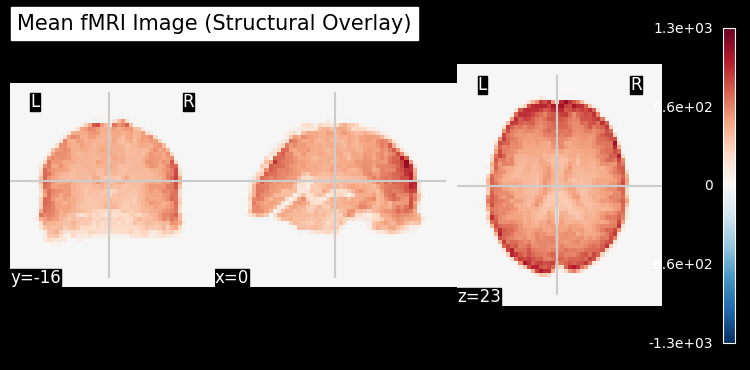

In [4]:
plot_mean_image(fmri_img, title="Mean fMRI Image (Structural Overlay)")

### Plot Glass Brain
- Provides a 3D overview of activity
- Useful for seeing general activation patterns

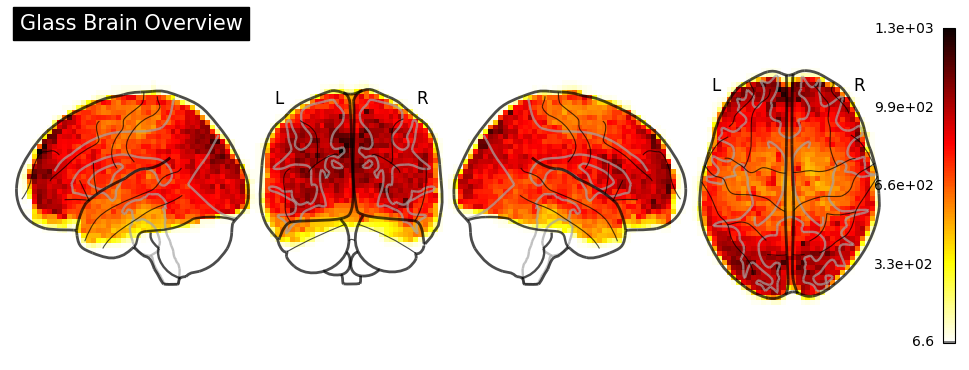

In [5]:
# Wrap back into a NIfTI image (keep affine)
mean_img = nib.Nifti1Image(np.mean(fmri_img.get_fdata(), axis=-1), affine=fmri_img.affine)
plot_glass_brain(mean_img, title="Glass Brain Overview")

### Deviation-from-Mean fMRI Plots
- Each plot shows **how the BOLD signal at a specific timepoint deviates from the mean across all timepoints**.  
- **Positive values (warm colors)** indicate voxels with higher-than-average activity at that time.  
- **Negative values (cool colors)** indicate voxels with lower-than-average activity.  
- The **threshold and diverging colormap** help highlight meaningful deviations, making small variations more visible.  
- Note that these are **raw signal deviations**, not statistical activations; subtle changes may reflect noise or physiological fluctuations.  
- These visualizations help you **identify temporal dynamics** in the fMRI signal and understand which regions are transiently more or less active relative to the average.

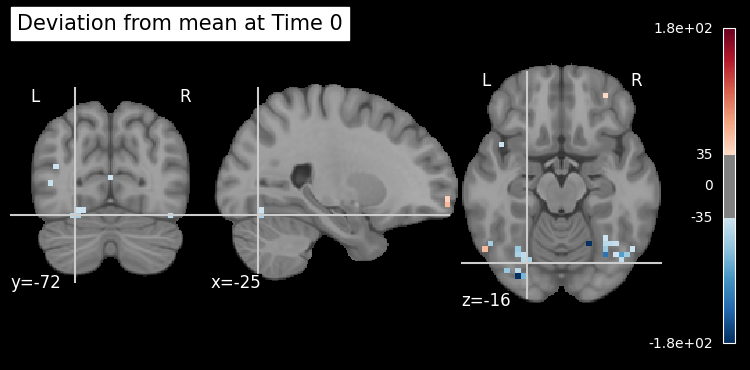

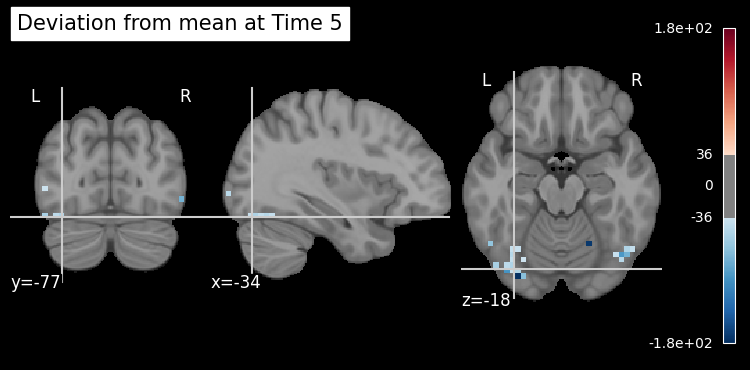

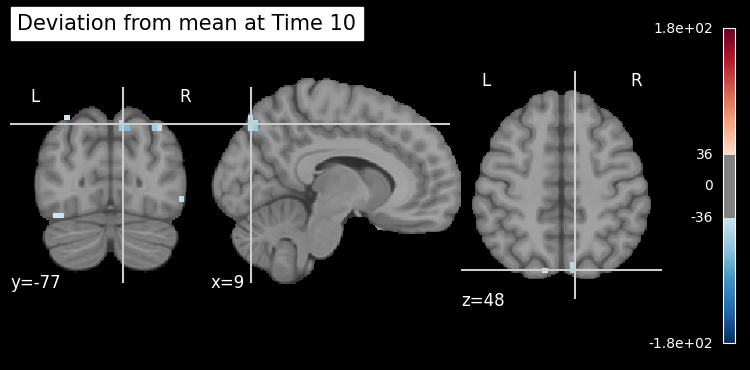

In [13]:
mean_data = np.mean(fmri_img.get_fdata(), axis=-1)
timepoints = [0, 5, 10]

for t in timepoints:
    vol_data = fmri_img.get_fdata()[..., t] - mean_data
    vol_img = nib.Nifti1Image(vol_data, fmri_img.affine)
    
    # Determine a symmetric threshold for better visualization
    vmax = np.max(np.abs(vol_data))
    plot_stat_map_3d(vol_img, title=f"Deviation from mean at Time {t}", threshold=vmax*0.2)